Project Title: Customer Churn Prediction and Analysis

Business Context:

In today's competitive telecom market, retaining customers is as important as acquiring new ones. Customer churn—the loss of clients or subscribers—is a key metric that impacts a company's revenue and growth. Understanding why customers leave and predicting who is likely to churn enables businesses to take proactive measures and improve customer retention.

Objective:

This project aims to build a machine learning model to predict customer churn based on historical behavior, service usage, and demographic information. Additionally, the project provides valuable insights through data exploration and visualization to help business teams take strategic actions.

Goals:

Analyze key factors that contribute to churn

Build and evaluate classification models for churn prediction

Create a user-friendly dashboard (optional) to monitor churn risk by customer segments

Provide actionable recommendations to reduce churn

Benefits to Business:

Reduce revenue loss by identifying at-risk customers

Enable targeted retention campaigns

Improve customer satisfaction by addressing churn-driving issues



In [ ]:
# importing the basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Loading the data

df = pd.read_csv("telco_customer_churn.csv.csv")


In [ ]:
# Basic checks

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.describe(include='O').T

,count,unique,top,freq
customerID,7043,7043,3186-AJIEK,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# Exploratory Data Analysis

 **Goals of EDA:**

Understand churn distribution

Analyze important features that affect churn

Identify patterns and correlations

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

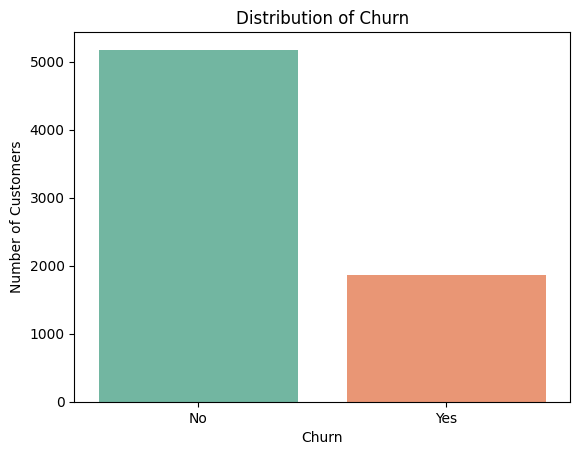

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [ ]:
# count of churn vs non-churn customers

sns.countplot(x='Churn', data =df, palette ='Set2')
plt.title("Distribution of Churn")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.show()

# percentage

churn_rate =df['Churn'].value_counts(normalize = True)*100
print(churn_rate)

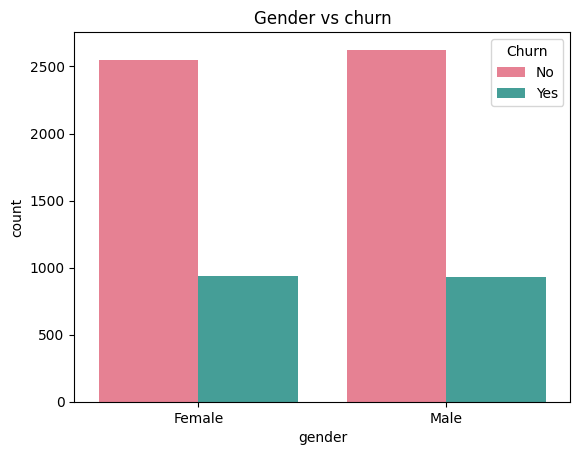

In [ ]:
# Gender vs Churn

sns.countplot(x="gender", hue="Churn", data =df, palette='husl')
plt.title('Gender vs churn')
plt.show()

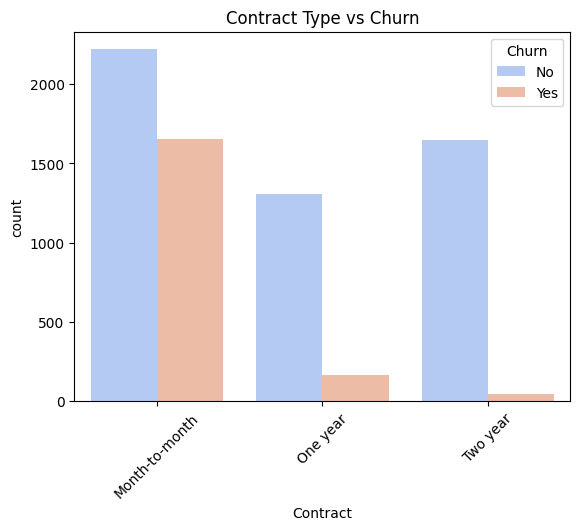

In [ ]:
# Contract Type vs Churn

sns.countplot(x="Contract", hue='Churn', data =df, palette="coolwarm")
plt.title("Contract Type vs Churn")
plt.xticks(rotation=45)
plt.show()

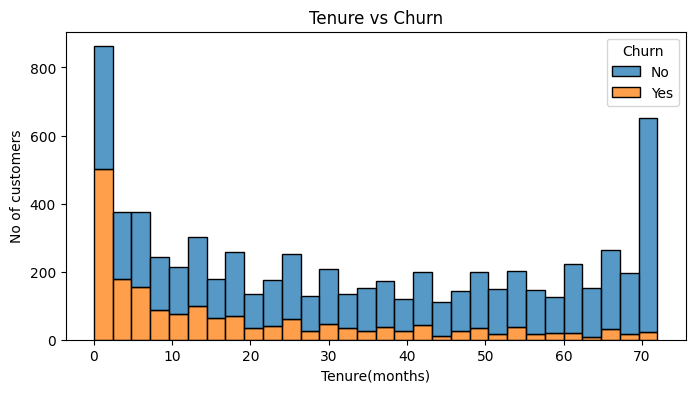

In [ ]:
# Tenure Distribution
plt.figure(figsize=(8,4))
sns.histplot(x='tenure', hue="Churn", data =df, multiple ='stack', bins =30)
plt.title("Tenure vs Churn")
plt.xlabel('Tenure(months)')
plt.ylabel("No of customers")
plt.show()

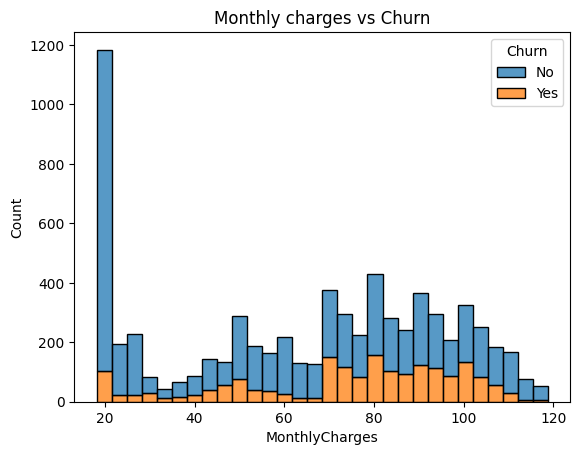

In [ ]:
# Monthly charges vs Churn

sns.histplot(x = "MonthlyCharges", hue="Churn", data =df, multiple="stack", bins = 30)
plt.title("Monthly charges vs Churn")
plt.show()

In [ ]:
# Data Prprocessing and Encoding

**Goal of Preprocessing**:

Convert categorical columns to numeric (using encoding)

Handle any missing or incorrect data

Convert column types if needed

Scale numerical values



In [ ]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
# Drop Irrelevant columns

df.drop("customerID", axis = 1, inplace = True)


In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# converting TotalCharges into Numeric

df['TotalCharges'] =pd.to_numeric(df['TotalCharges'], errors= 'coerce')
df['TotalCharges'].isnull().sum()


np.int64(0)

**Encoding Categorical Columns**

Label Encoding for binary columns

One-Hot Encoding for multi-class columns

In [ ]:
# Clean and encode binary columns
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in binary_cols:
    df[col] = df[col].astype(str).str.strip().str.capitalize()
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Clean and encode gender
df['gender'] = df['gender'].astype(str).str.strip().str.capitalize()
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})


In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotlaCharges
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,29.85
1,1,0,0,0,34,1,No,DSL,Yes,No,...,No,No,No,One year,0,Mailed check,56.95,1889.5,0,1889.50
2,1,0,0,0,2,1,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,108.15
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,...,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,1840.75
4,0,0,0,0,2,1,No,Fiber optic,No,No,...,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,151.65


In [ ]:
# One Hot Encoding for multi category columns

multi_cols = ['MultipleLines','InternetService','OnlineSecurity',
              'OnlineBackup','DeviceProtection','TechSupport',
              'StreamingTV','StreamingMovies','Contract','PaymentMethod']
df=pd.get_dummies(df,columns=multi_cols,drop_first =True)

In [ ]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(0,inplace=True)

In [ ]:
# scaling numerical columns (optional but useful for some columns)

from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

df[['TotalCharges','MonthlyCharges','tenure']]=scaler.fit_transform(
df[['TotalCharges','MonthlyCharges','tenure']])


# Model building with the Logistic Regression

In [ ]:

# split features and target

x,y=df.drop('Churn', axis =1),df['Churn']

In [ ]:
# Train test Split

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42, stratify =y)

In [ ]:
# Build and train Logistic Regression Model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Make Predictions
y_pred = model.predict(x_test)

In [ ]:
# Evaluate the Model

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("\nclassification report:\n",classification_report(y_test,y_pred))
print("\n confusion matrix:\n", confusion_matrix(y_test,y_pred))

Accuracy Score: 0.8062455642299503

classification report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409


 confusion matrix:
 [[927 108]
 [165 209]]


# Train a Random Forest Classifier

In [ ]:
# Import and train the model

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state = 42)
rf_model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# make prediction
rf_pred=rf_model.predict(x_test)

In [ ]:
# Evaluate the model

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy Score:",accuracy_score(y_test,rf_pred))
print("\n Classification Report:\n", classification_report(y_test,rf_pred))
print("\n Confussion matrix:\n", confusion_matrix(y_pred,rf_pred))

Accuracy Score: 0.7835344215755855

 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.48      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409


 Confussion matrix:
 [[1028   64]
 [  92  225]]


### 📌 Final Summary – Telco Customer Churn Prediction Project

In this project, we analyzed the Telco Customer Churn dataset to identify patterns and build a machine learning model capable of predicting whether a customer is likely to churn (cancel their subscription).

#### 🔍 Business Objective:
To help telecom companies proactively retain customers by accurately predicting churn and understanding which features influence customer behavior the most.


#### 🧹 Steps Performed:

- ✅ Loaded and cleaned the dataset
- ✅ Handled missing values and dropped irrelevant columns (`customerID`)
- ✅ Performed **Exploratory Data Analysis (EDA)** to identify churn-related trends
- ✅ Applied **Label Encoding** and **One-Hot Encoding** to categorical variables
- ✅ Standardized numerical columns using **scaling**
- ✅ Built and compared multiple machine learning models

#### 📊 Models Evaluated:

| Model                 | Accuracy | Key Notes |
|----------------------|----------|-----------|
| Logistic Regression  | 81%      | Simple, interpretable, missed more churners (higher FN) |
| Random Forest (Default) | 78%   | **Best performance in catching churners (higher TP, lower FN)** ✅ |

- Though Random Forest showed slightly lower accuracy, it **performed better in detecting churn

#### 💡 Key Insights:

- Customers with longer tenure, fiber optic internet, and higher monthly charges are more likely to churn.
- Features like `Contract`, `TechSupport`, and `PaymentMethod` showed strong influence on churn probability.
- Random Forest's feature importance highlighted the top churn-driving attributes.


#### ✅ Final Model:
We selected **Random Forest Classifier (default parameters)** as the final model based on its practical performance in identifying churners with a balanced confusion matrix.

---